<a href="https://colab.research.google.com/github/IronZiiz/Data-Science_Time-Series/blob/main/Seasonality_Time_series_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Analysing newsletter subscribers

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [ ]:
assinantes = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

,0
mes,object
assinantes,int64


In [ ]:
print('Qntd linhas e colunas:', assinantes.shape)
print('Qntd de dados nulos:',assinantes.isna().sum().sum())

Qntd linhas e colunas: (24, 2)
Qntd de dados nulos: 0


In [ ]:
assinantes['mes']= pd.to_datetime(assinantes['mes'])
assinantes.dtypes

,0
mes,datetime64[ns]
assinantes,int64


In [ ]:
# aumento no numero de assinantes
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  plt.show()

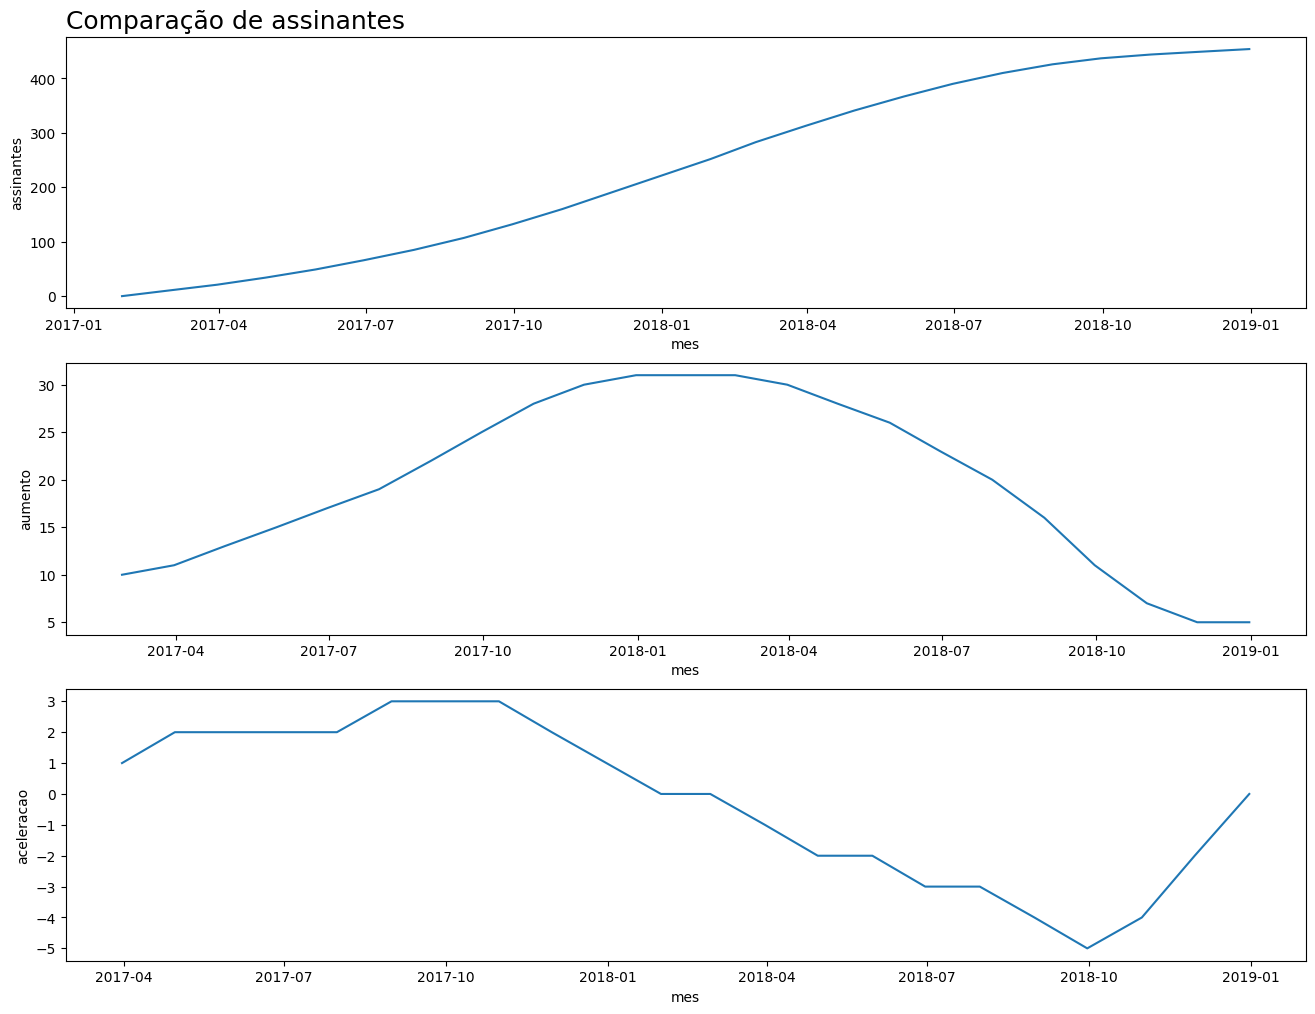

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',
                assinantes, 'Comparação de assinantes')

Seasonality - Chocolura


In [ ]:
chocolura = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

,0
mes,object
vendas,int64


In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

,0
mes,datetime64[ns]
vendas,int64


In [ ]:
print('Qntd linhas e colunas:', chocolura.shape)
print('Qntd de dados nulos:',chocolura.isna().sum().sum())

Qntd linhas e colunas: (24, 2)
Qntd de dados nulos: 0


In [ ]:
chocolura['aumento']  = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


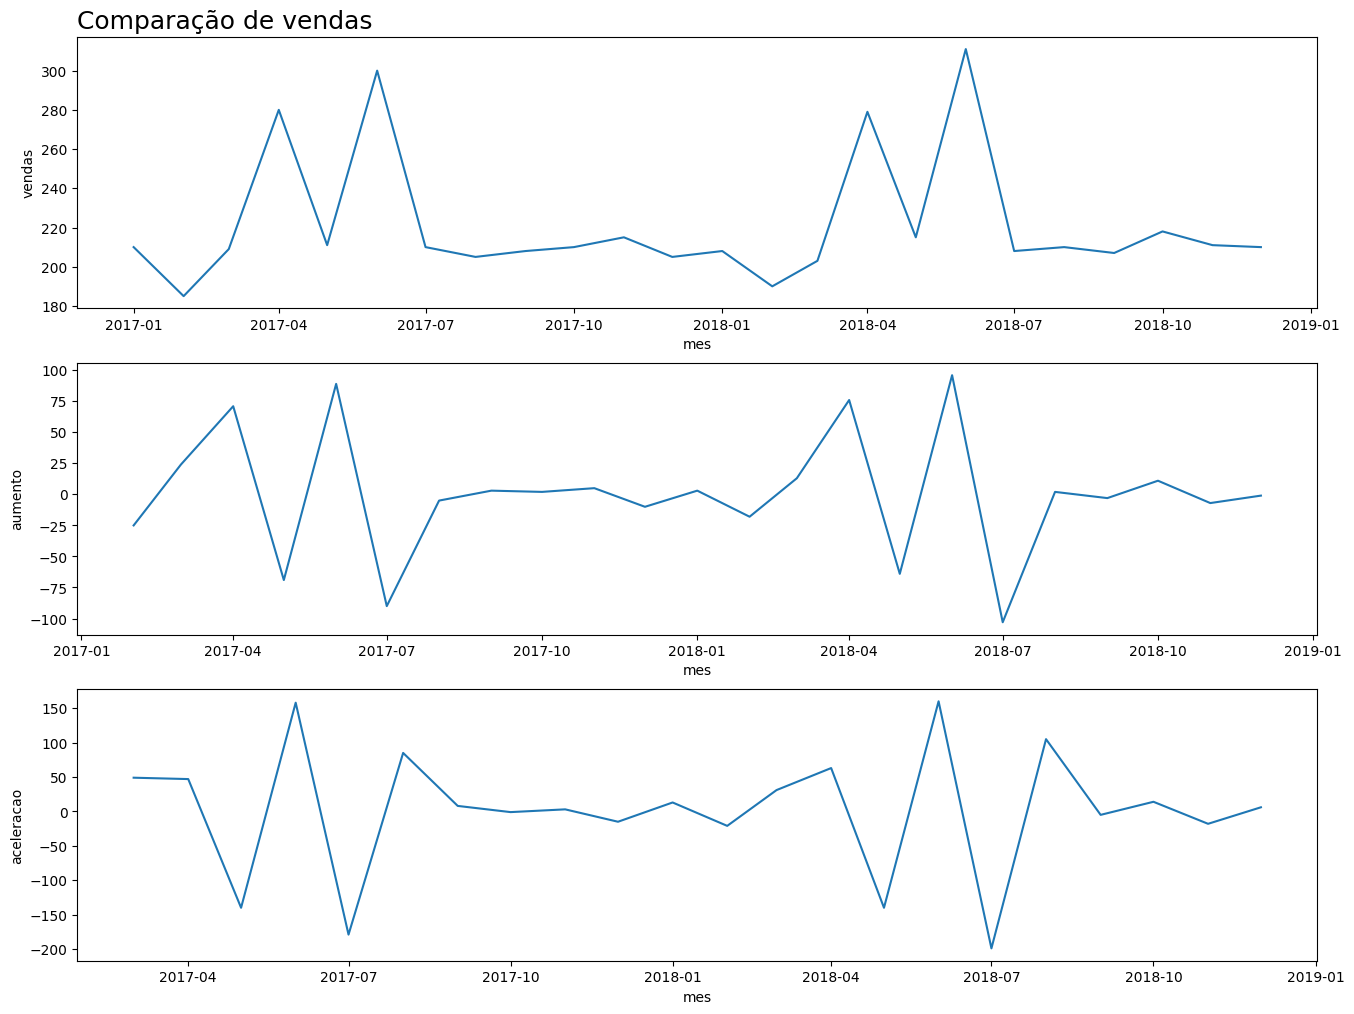

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                chocolura, 'Comparação de vendas')

Chocolura - Vendas diárias(Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print('Qntd linhas e colunas:', vendas_por_dia.shape)
print('Qntd de dados nulos:',vendas_por_dia.isna().sum().sum())

Qntd linhas e colunas: (61, 2)
Qntd de dados nulos: 0


In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

,0
dia,datetime64[ns]
vendas,int64


In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


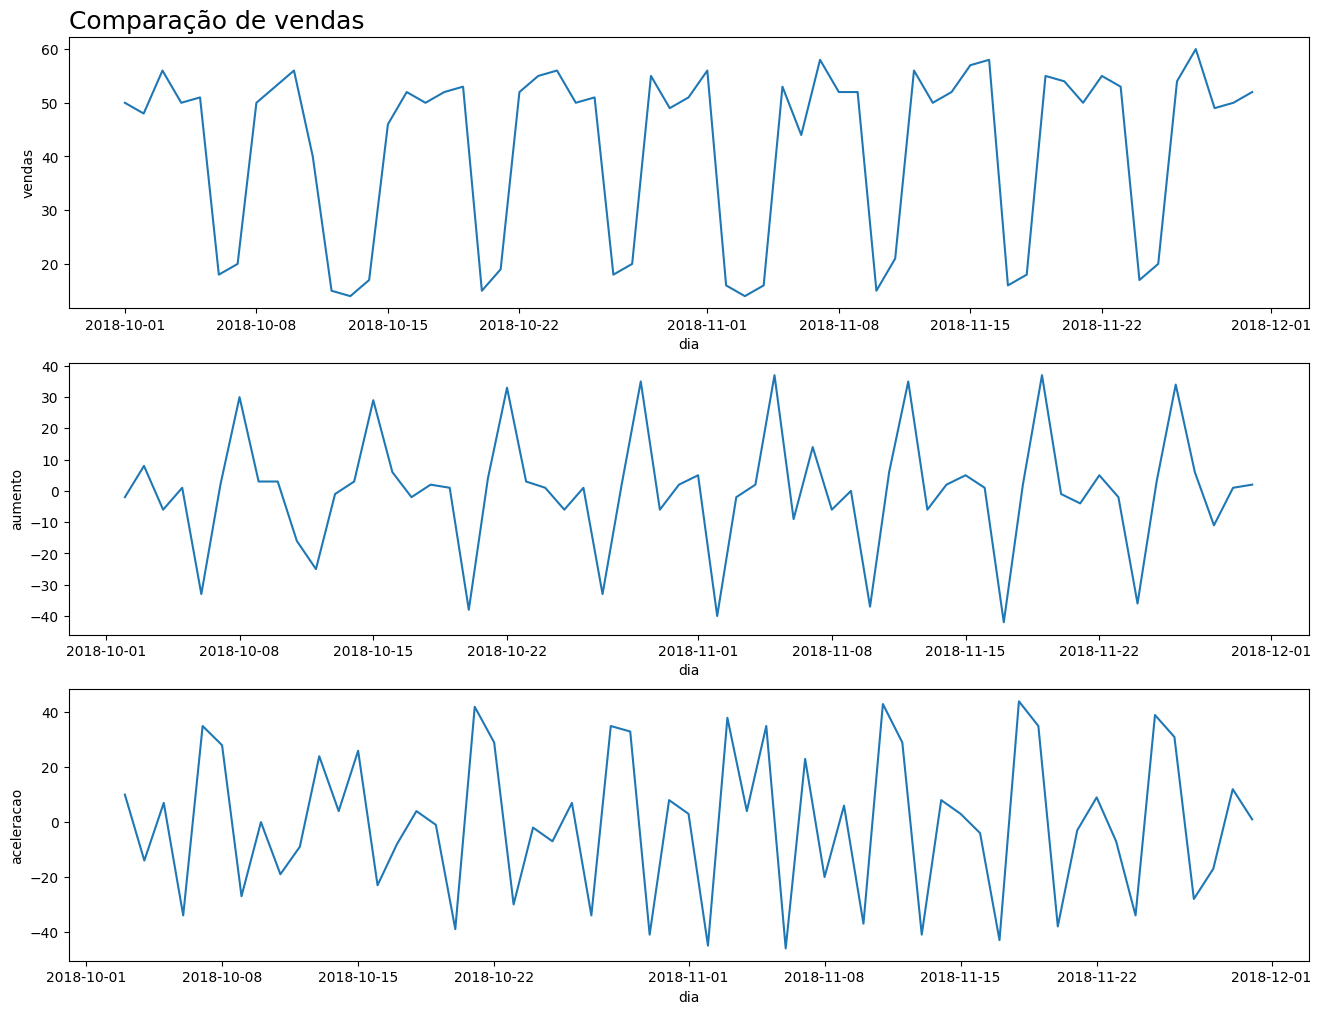

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                vendas_por_dia, 'Comparação de vendas')


Analysing Seasonality

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.dayofweek
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4


In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
0,52.0,34.0,31.0
1,52.0,-1.0,-34.0
2,53.0,1.0,2.0
3,51.0,-2.0,-3.0
4,45.0,-7.0,-5.0
5,16.0,-28.0,-20.0
6,19.0,3.0,31.0


Correlation day sales

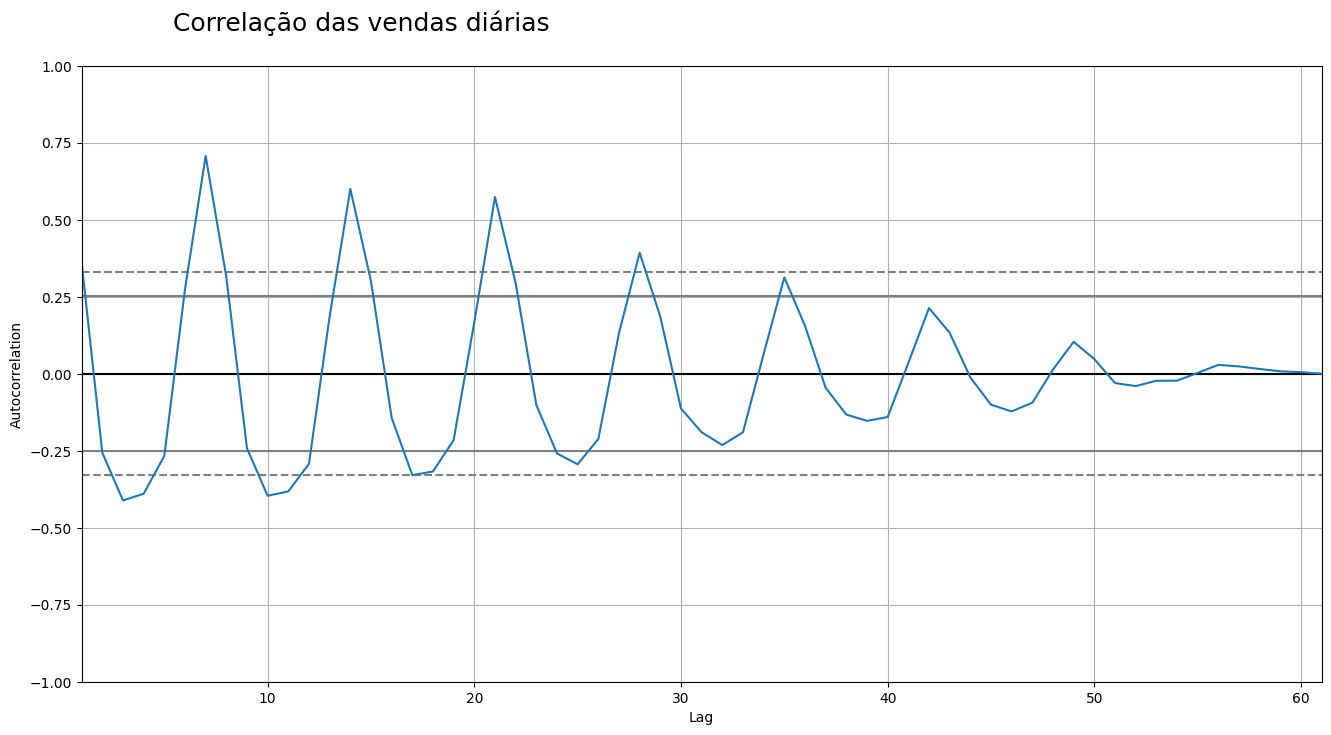

In [ ]:
ax = plt.figure(figsize = (16,8))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

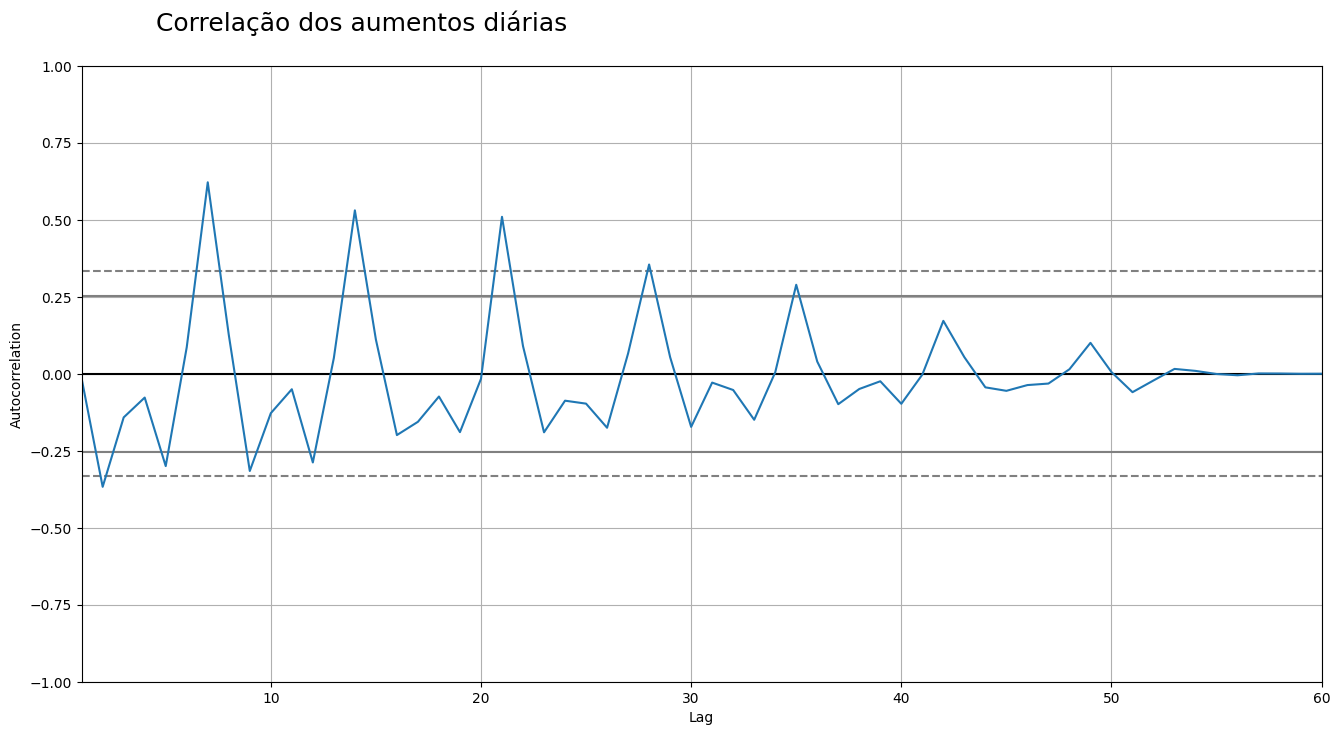

In [ ]:
ax = plt.figure(figsize = (16,8))
ax.suptitle('Correlação dos aumentos diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

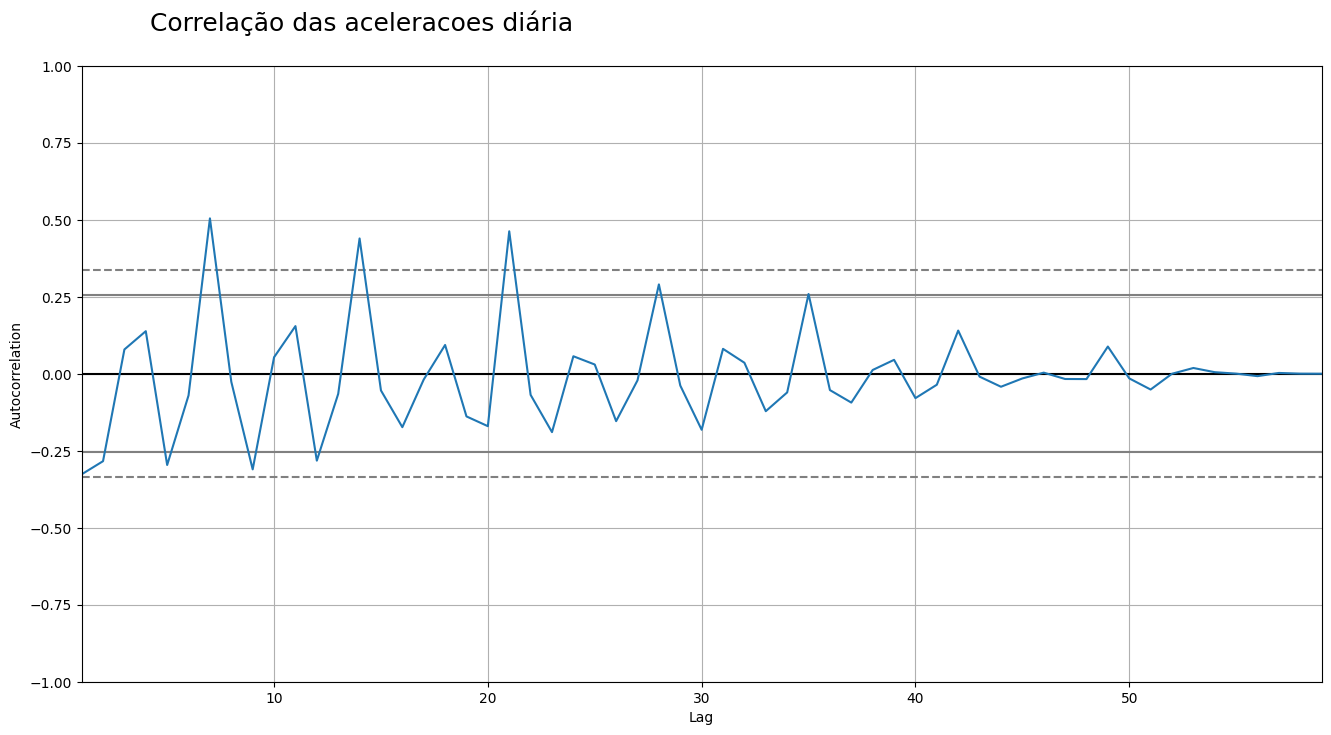

In [ ]:
ax = plt.figure(figsize = (16,8))
ax.suptitle('Correlação das aceleracoes diária', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax